<a href="https://colab.research.google.com/github/rachelccq0522/rachelccq0522/blob/main/Causal_Inference/IEOR4578_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IEOR 4578 Final Project - The Effect of Spotify Premium Service on User Engagement

Project Group Members: Rachel Chen (cc4768), Shirley Gui (xg2378), Yuheng Ling (yl4615), Jiayi Nie (jn2810)

The original dataset is over 50G, thus it is super hard to handle on our own, so we use the mini version instead.
Datasets are downloaded from: https://www.aicrowd.com/challenges/spotify-sequential-skip-prediction-challenge/dataset_files


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
% cd drive/MyDrive/'IEOR4578 Causal Inference Final Project'

/content/drive/MyDrive/IEOR4578 Causal Inference Final Project


### Data Cleaning and Exploratory Data Analysis

In [ ]:
# import necessary packages, load the csvs

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import optimize
from scipy.special import expit
from scipy.stats import bernoulli, norm
import matplotlib.pyplot as plt

df1 = pd.read_csv('tf_mini.csv')
df2 = pd.read_csv('log_mini.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


df1 (tf_mini) lists the characteristics of each track, evaluating every track from 30 aspects like loudness, speechiness etc. df2 (log_mini) contains information about each session, specific actionos when listening, and user type (whether premium or not).

In [ ]:
df1.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [ ]:
df2.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


Based on our experiences with Spotify and our research from internet resources, we generated the associated DAG for solving our problem (shown inside the report). Our data cleaning process is based on the DAG.

### Data Cleaning and Exploratory Data Analysis

In [ ]:
# select relevant track info columns to generate the track_agg_score

tracks = ['acousticness', 'beat_strength', 'bounciness', 'danceability',
        'energy', 'flatness', 'liveness',  'mechanism', 'organism',
        'speechiness','valence']

In [ ]:
df1[tracks].describe()

,acousticness,beat_strength,bounciness,danceability,energy,flatness,liveness,mechanism,organism,speechiness,valence
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,0.250336,0.492075,0.514526,0.611742,0.641440,0.996548,0.205520,0.547603,0.391874,0.122998,0.487804
std,0.276047,0.158102,0.182595,0.166146,0.207957,0.045611,0.176486,0.223803,0.207116,0.136022,0.246376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025291,0.374378,0.372463,0.502499,0.507839,0.975910,0.098249,0.366652,0.225742,0.038028,0.292559
50%,0.135821,0.493764,0.522266,0.625145,0.661368,1.003790,0.131403,0.571023,0.364057,0.061794,0.478244
75%,0.406142,0.604994,0.655912,0.736241,0.803185,1.026137,0.262823,0.729537,0.533131,0.160202,0.677947
max,0.995796,0.990419,0.972590,0.984952,0.999877,1.103213,0.996257,1.000000,0.962350,0.961408,0.999990


In [ ]:
# standardize the columns and take mean for each row to generate track_agg_score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
track_agg_score = scaler.fit_transform(df1[tracks]).mean(axis=1)
df1['track_agg_score'] = track_agg_score

In [ ]:
# combine the two dataframes based on track_id with only columns in interest (based on DAG)

final_df = df1[['track_id', 'track_agg_score','us_popularity_estimate']].merge(df2[['track_id_clean','session_length','premium', 'context_type', 'hour_of_day']], how='inner', left_on='track_id', right_on='track_id_clean')
final_df.drop(columns=['track_id_clean'], inplace=True)
final_df.head()

,track_id,track_agg_score,us_popularity_estimate,session_length,premium,context_type,hour_of_day
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.045718,99.975414,10,True,user_collection,10
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.049155,99.969430,11,True,radio,23
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.049155,99.969430,11,True,radio,23
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,-0.016448,99.602549,10,True,user_collection,22
4,t_070a63a0-744a-434e-9913-a97b02926a29,-0.055965,99.665018,20,True,catalog,20


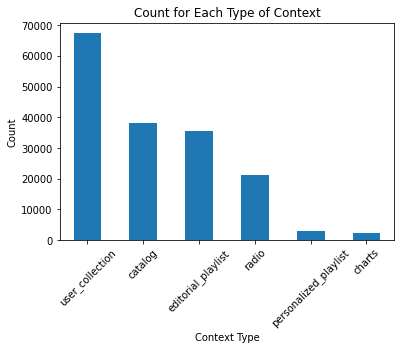

In [ ]:
# make a bar plot to show the distribution of context_type

final_df['context_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Count for Each Type of Context')
plt.xlabel('Context Type')
plt.ylabel('Count')
plt.show()

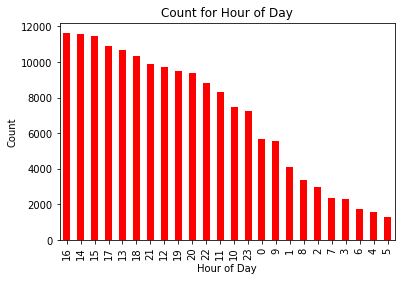

In [ ]:
# make a bar plot to show the distribution of hour_of_day

final_df['hour_of_day'].value_counts().plot(kind='bar', color = 'red')
plt.title('Count for Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

In [ ]:
# standardize the popularity and track_agg_score column

final_df[['us_popularity_estimate']] = scaler.fit_transform(final_df[['us_popularity_estimate']])
final_df[['track_agg_score']] = scaler.fit_transform(final_df[['track_agg_score']])

In [ ]:
# make premium column to be 0/1 representation

final_df.premium = final_df.premium.astype(int)

In [ ]:
# change context_type representationn using one-hot encoding and omit one column to remove colinearity

from sklearn.preprocessing import OneHotEncoder

enc = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(final_df[['context_type']]).toarray())
enc = enc.rename(columns = {0: 'catalog', 1:'charts', 2:'editorial_playlist', 3:'personalized_playlist', 4:'radio', 5:'user_collection'})
enc = enc.drop(columns=['catalog'])

In [ ]:
# change hour_of_day representationn using one-hot encoding and omit one column to remove colinearity

enc1 = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(final_df[['hour_of_day']]).toarray())
enc1 = enc1.iloc[:, 1:24]

In [ ]:
# append the two dfs (after one_hot) to final_df and remove the original two columns for context_type and hour_of_day

final_df = final_df.drop(columns=['context_type', 'hour_of_day'])
final_df = pd.concat([final_df, enc, enc1], axis = 1)

In [ ]:
# change column names for hour_of_day associated columns

final_df = final_df.rename(columns = {1:'hour_1', 2:'hour_2', 3:'hour_3', 4:'hour_4', 5:'hour_5', 6:'hour_6',
                                      7:'hour_7', 8:'hour_8', 9:'hour_9', 10:'hour_10', 11:'hour_11', 12:'hour_12',
                                      13:'hour_13', 14:'hour_14', 15:'hour_15', 16:'hour_16', 17:'hour_17', 18:'hour_18',
                                      19:'hour_19', 20:'hour_20', 21:'hour_21', 22:'hour_22', 23:'hour_23'})

In [ ]:
final_df.head()

,track_id,track_agg_score,us_popularity_estimate,session_length,premium,charts,editorial_playlist,personalized_playlist,radio,user_collection,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.408743,0.258555,10,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.418595,0.251851,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.418595,0.251851,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,-0.324851,-0.159093,10,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,t_070a63a0-744a-434e-9913-a97b02926a29,-0.438113,-0.089121,20,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


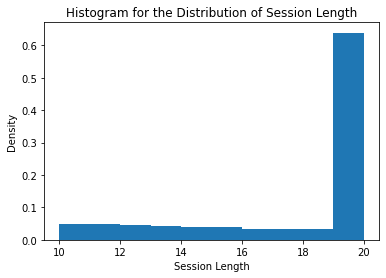

In [ ]:
# plot to show the distribution of session_length

plt.hist(final_df['session_length'], density = True, bins = 10)
plt.xlabel('Session Length')
plt.ylabel('Density')
plt.title('Histogram for the Distribution of Session Length')
plt.show()

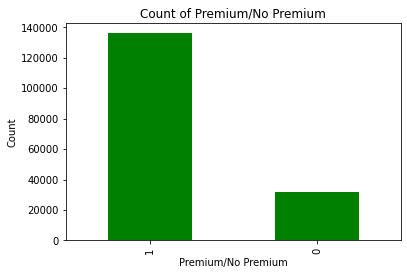

In [ ]:
# plot to show the count of premium/not

final_df['premium'].value_counts().plot(kind='bar', color = 'green')
plt.xlabel('Premium/No Premium')
plt.ylabel('Count')
plt.title('Count of Premium/No Premium')
plt.show()

### First Method: Standardization

In [ ]:
final_df.head()

,track_id,track_agg_score,us_popularity_estimate,session_length,premium,charts,editorial_playlist,personalized_playlist,radio,user_collection,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.408743,0.258555,10,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.418595,0.251851,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.418595,0.251851,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,-0.324851,-0.159093,10,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,t_070a63a0-744a-434e-9913-a97b02926a29,-0.438113,-0.089121,20,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
## use standardization to estimate the ATE

final_df['premium'].astype('category')

std_mod = smf.ols('session_length ~ premium + track_agg_score + us_popularity_estimate + charts + editorial_playlist + personalized_playlist + radio + user_collection + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=final_df).fit()
df_0 = final_df.copy()
df_0['premium'] = 0
df_1 = final_df.copy()
df_1['premium'] = 1

final_df['Y0'] = std_mod.predict(df_0)
final_df['Y1'] = std_mod.predict(df_1)
final_df['delta'] = final_df['Y1'] - final_df['Y0']
print(np.mean(final_df['delta']))

0.7361670974969842


### Second Method: IP Weighting

In [ ]:
final_df.head()

,track_id,track_agg_score,us_popularity_estimate,session_length,premium,charts,editorial_playlist,personalized_playlist,radio,user_collection,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Y0,Y1,delta
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.408743,0.258555,10,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.976576,17.712744,0.736167
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.418595,0.251851,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.586488,18.322655,0.736167
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,-0.418595,0.251851,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.586488,18.322655,0.736167
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,-0.324851,-0.159093,10,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.613610,18.349777,0.736167
4,t_070a63a0-744a-434e-9913-a97b02926a29,-0.438113,-0.089121,20,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.666188,17.402355,0.736167


In [ ]:
# ip weighting to get rid of selection bias from conditioning on A

final_df['premium'].astype('category')

weight_mod = smf.logit('premium ~  track_agg_score + us_popularity_estimate', data=final_df).fit()
final_df['prop'] = weight_mod.predict(final_df)
final_df['weight'] = 1/ final_df['prop']
loc = final_df['premium'] == 0
final_df['weight'][loc] = 1 / (1 - final_df['prop'])

mod = smf.wls('session_length ~ premium + charts + editorial_playlist + personalized_playlist + radio + user_collection + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', weights=final_df['weight'], data=final_df).fit()
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.477627
         Iterations 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


                            WLS Regression Results                            
Dep. Variable:         session_length   R-squared:                       0.021
Model:                            WLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        23:35:02   Log-Likelihood:            -4.6604e+05
No. Observations:              167880   AIC:                         9.321e+05
Df Residuals:                  167850   BIC:                         9.324e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.15